### Roxana Aranda A01613911
# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.



# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Importing data
1. Load dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Convertir el dataset a un DataFrame de pandas
df_digits = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])

# Agregar la columna de etiquetas (target)
df_digits['target'] = digits.target

# Mostrar las primeras filas del DataFrame
df_digits.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
df_digits.tail()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


# Undertanding and preprocessing the data

2. What is the data?

Is a collection of 250 samples from 44 writers. This dataset is usually used for Pen-Based Recognition of Handwritten Digits.


3. Plot some values


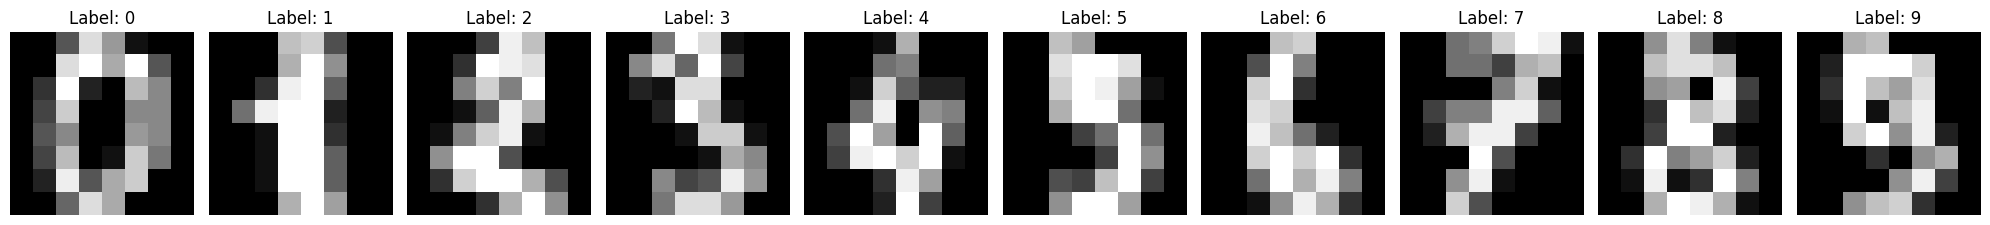

In [4]:
n_images = 10

plt.figure(figsize=(20, 14))

# Graficar las primeras 'n_images' imágenes de dígitos
for index in range(n_images):
    plt.subplot(1, n_images, index + 1)
    plt.imshow(digits.images[index], cmap='gray')
    plt.title(f"Label: {digits.target[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

4. Aplicar estadistica descriptiva


In [5]:
df_digits.describe()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [6]:
df_digits.shape

(1797, 65)

Now the label/category is numeric


5. Box plot of the data

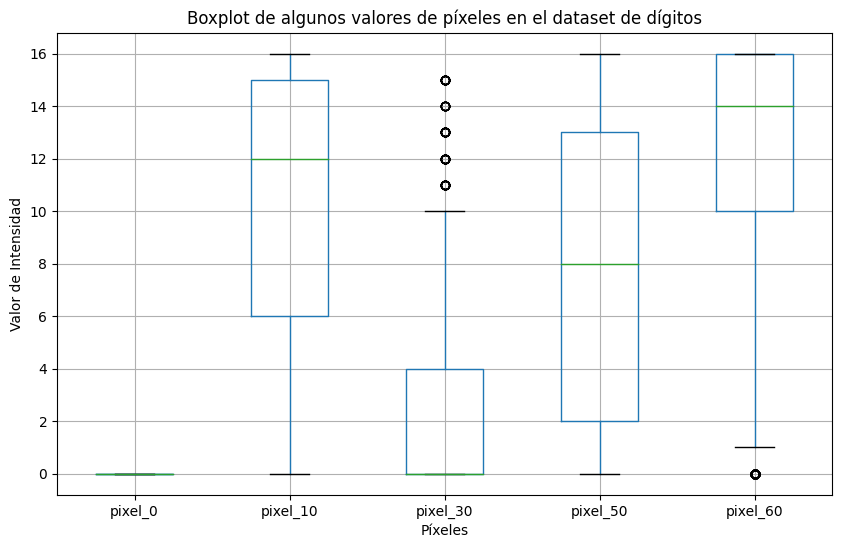

In [7]:
pixels_to_plot = ['pixel_0', 'pixel_10', 'pixel_30', 'pixel_50', 'pixel_60']

# Crear el boxplot para los píxeles seleccionados
plt.figure(figsize=(10, 6))
df_digits[pixels_to_plot].boxplot()
plt.title('Boxplot de algunos valores de píxeles en el dataset de dígitos')
plt.xlabel('Píxeles')
plt.ylabel('Valor de Intensidad')
plt.show()


Scatter plot



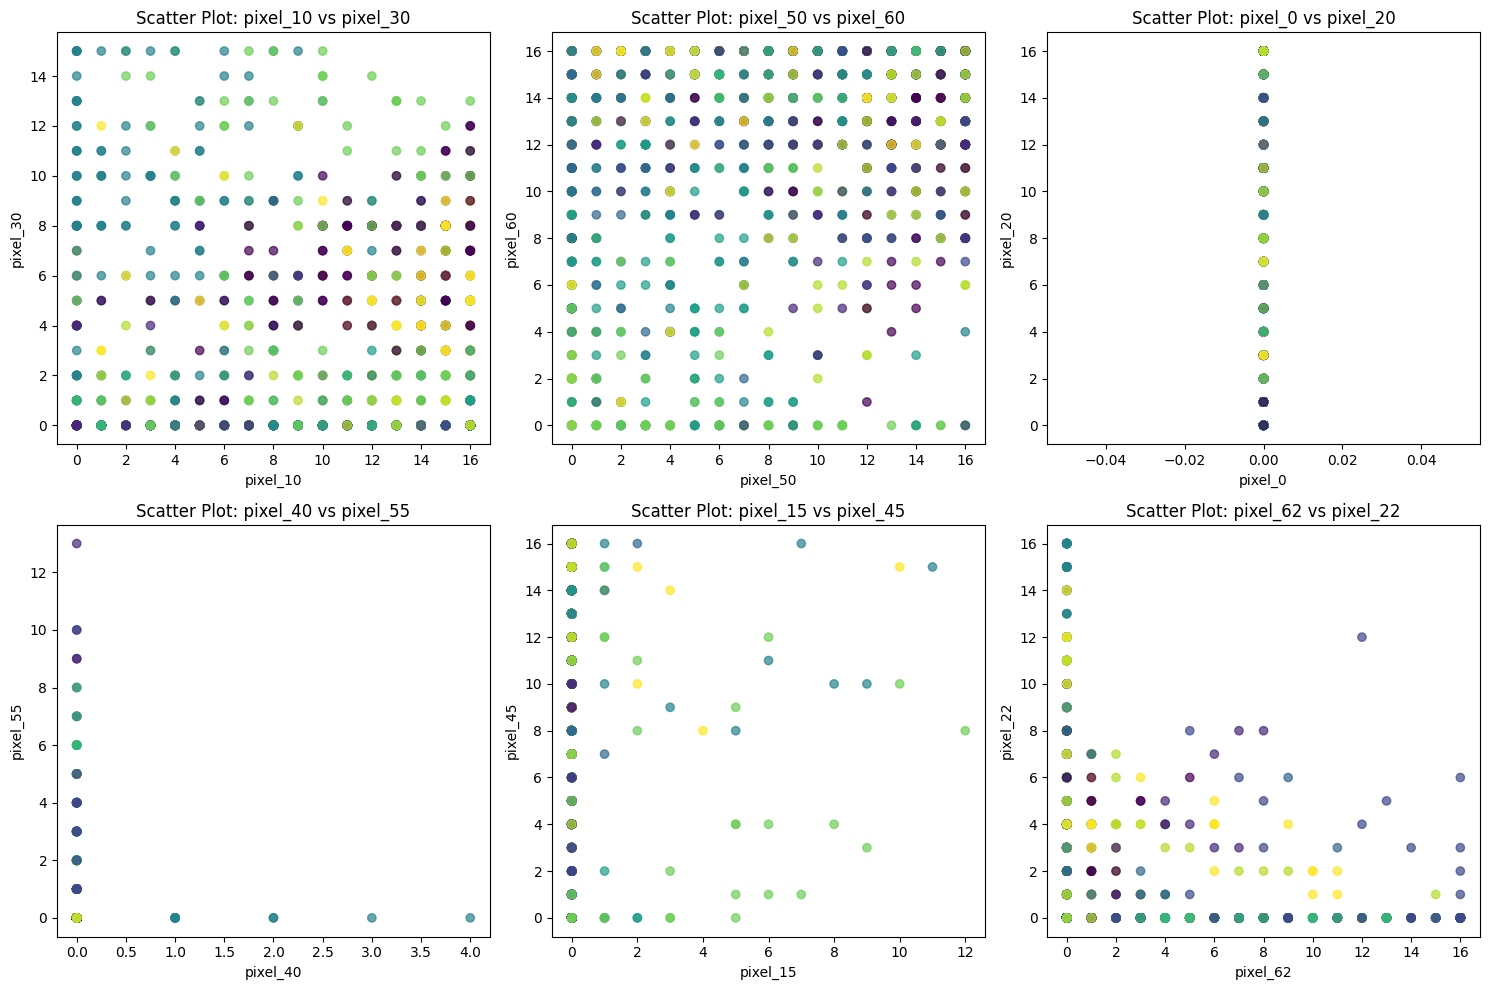

In [8]:
# Seleccionar 5 pares de píxeles para graficar
pixel_pairs = [
    ('pixel_10', 'pixel_30'),
    ('pixel_50', 'pixel_60'),
    ('pixel_0', 'pixel_20'),
    ('pixel_40', 'pixel_55'),
    ('pixel_15', 'pixel_45'),
    ('pixel_62', 'pixel_22')
]

# Crear las gráficas
plt.figure(figsize=(15, 10))

for i, (pixel_x, pixel_y) in enumerate(pixel_pairs, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df_digits[pixel_x], df_digits[pixel_y], c=df_digits['target'], cmap='viridis', alpha=0.7)
    plt.title(f'Scatter Plot: {pixel_x} vs {pixel_y}')
    plt.xlabel(pixel_x)
    plt.ylabel(pixel_y)

plt.tight_layout()
plt.show()


6. K-means with the data

In [9]:
#K es 10, uno por cada digito
k = 10
data_clustering = df_digits.drop('target', axis=1)
kmeans = KMeans(n_clusters= k, n_init=10, random_state=42)
kmeans.fit_predict(data_clustering)

dc = data_clustering.copy()
dc['cluster'] = kmeans.labels_


In [10]:
dc[:]

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,3
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,3
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,6
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,8
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,1
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,3
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,8


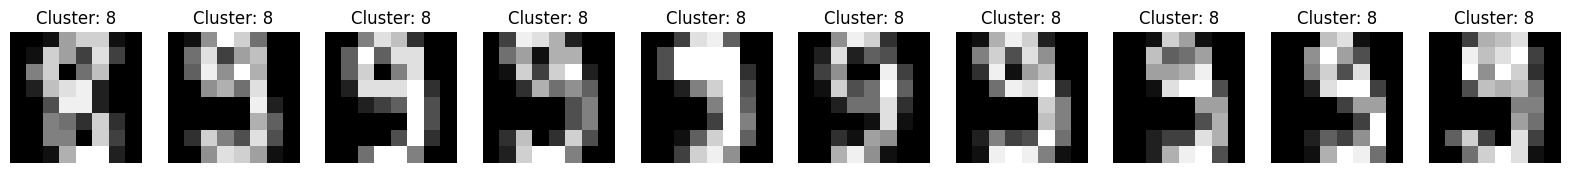

In [28]:
cluster_number = 8
cluster_images = dc[dc['cluster'] == cluster_number]

n_images = 10
selected_images = cluster_images.sample(n_images, random_state=42)  # Selecciona aleatoriamente 10 imágenes del clúster

plt.figure(figsize=(20, 14))

for n, i in enumerate(selected_images.index):
    plt.subplot(1, 10, n + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Cluster: {cluster_number}")
    plt.axis('off')

plt.show()

In [12]:
data_clustering.shape

(1797, 64)

7. K-meas for each row, for each image

Hacemos una matriz para acomodar las filas, ayuda a facilitar la vizualización y más adelante hacer el kmean rápido

In [13]:
#Matrix for each row
dc1 = data_clustering.copy()
row = dc1.iloc[1]

matrix = []
for i in range(0, len(row), 8):
  matrix.append(row[i:i+8].values.tolist())

# Crear un nuevo DataFrame a partir de la matriz
df_m1 = pd.DataFrame(matrix, columns=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8'])





In [33]:
k = 1
kmeans = KMeans(n_clusters= k, n_init=10, random_state=42)
kmeans.fit_predict(df_m1)

dc2 = df_m1.copy()
dc2['cluster'] = kmeans.labels_

In [34]:
dc2

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,cluster
0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0
1,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0
2,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0
3,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0
4,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0
5,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0
6,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0
7,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,0


8. K-means for each column, of the image

In [38]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Transpose the DataFrame to cluster columns
kmeans.fit_predict(df_m1.T)

dc3 = df_m1.T
# Assign cluster labels to columns
dc3['cluster'] = kmeans.labels_


In [39]:
dc3

,0,1,2,3,4,5,6,7,cluster
Col1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Col2,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0
Col3,0.0,0.0,3.0,15.0,1.0,1.0,1.0,0.0,0
Col4,12.0,11.0,15.0,16.0,16.0,16.0,16.0,11.0,1
Col5,13.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,1
Col6,5.0,9.0,6.0,2.0,3.0,6.0,6.0,10.0,0
Col7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Col8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


9. Conlusiones

A lo largo de la practica se observa, como existen ciertos datos del set los cuales se dificultan más al algoritmo poder distingir que otros. Como algunos números que estan más 'deformados' que otros, por ejemplo la fila 2 es confundida y relacionada a la figura de la fila 1.

Entonces aunque hay partes que son más faciles de acomodar para el algoritmos, existen otras imagenes que representan una dificultad mayor. Con las filas y las columnas, si reducimos el tamano de los clusters, nos daremos cuenta que la mayoria de los puntos quedan con un centro similar, pero tambien tiene ciertas excepciones.


10. Referencias
  *   A demo of K-Means clustering on the handwritten digits data. (n.d.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
  *   The digit Dataset. (n.d.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

